# Experiment
classification task of Cardiac Arrhythmia Database

## Data preprocessing

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.style.use('ggplot')

In [2]:
#Load the dataset
df = pd.read_csv('data/arrhythmia.data',header=None)

#Print the first 5 rows of the dataframe.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [3]:
#Let's observe the shape of the dataframe.
df.shape

(452, 280)

In [4]:
X = pd.concat([df.iloc[:,:12],df.iloc[:,22:27], df.iloc[:,269:278]], axis=1, sort=False).values
y = df.iloc[:,279].values

## Feature Selection

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

# Delete column with '?'
df1=df[~df[:].isin(['?'])]
df1 = df1.dropna(axis=1)
# Delete columns with values less than 0
df1[df1 < 0] = np.nan
df1 = df1.dropna(axis=1)

sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
df1 = sel.fit_transform(df1)
print(df1)

# Univariate feature selection
X_old = df1[:,0:94]
y = df.iloc[:,279].values
for i,val in enumerate(y):
    if val == 1:
        y[i] = 1
    elif val > 1 and val < 16:
        y[i] = 2
    else:
        y[i] = 3
y = y.astype('int')

X = SelectKBest(chi2, k=10).fit_transform(X_old, y)
print(X)

[[ 75.    0.  190.  ...  13.5   9.    8. ]
 [ 56.    1.  165.  ...  11.    8.5   6. ]
 [ 54.    0.  172.  ...  11.1   9.5  10. ]
 ...
 [ 36.    0.  166.  ...  22.   16.3   2. ]
 [ 32.    1.  155.  ...  15.3  12.    1. ]
 [ 78.    1.  160.  ...  12.5  10.4   1. ]]
[[20. 48. 80. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [52.  0.  0. ...  0.  0.  0.]
 ...
 [56.  0.  0. ...  0.  0.  0.]
 [ 0. 12.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [45]:
#importing train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_traindf = pd.DataFrame(X_train)
y_traindf = pd.DataFrame(y_train)
trainData = pd.concat([X_traindf,y_traindf], axis=1, sort=False)

new_col = ['0', '1','2','3','4','5','6','7','8','9', 'lable']
trainData.columns = new_col

filter1 = trainData["lable"].isin([1])
trainData_1 = trainData[filter1].values

filter2 = trainData["lable"].isin([2])
trainData_2 = trainData[filter2].values

filter3 = trainData["lable"].isin([3])
trainData_3 = trainData[filter3].values

## Draw histograms for features

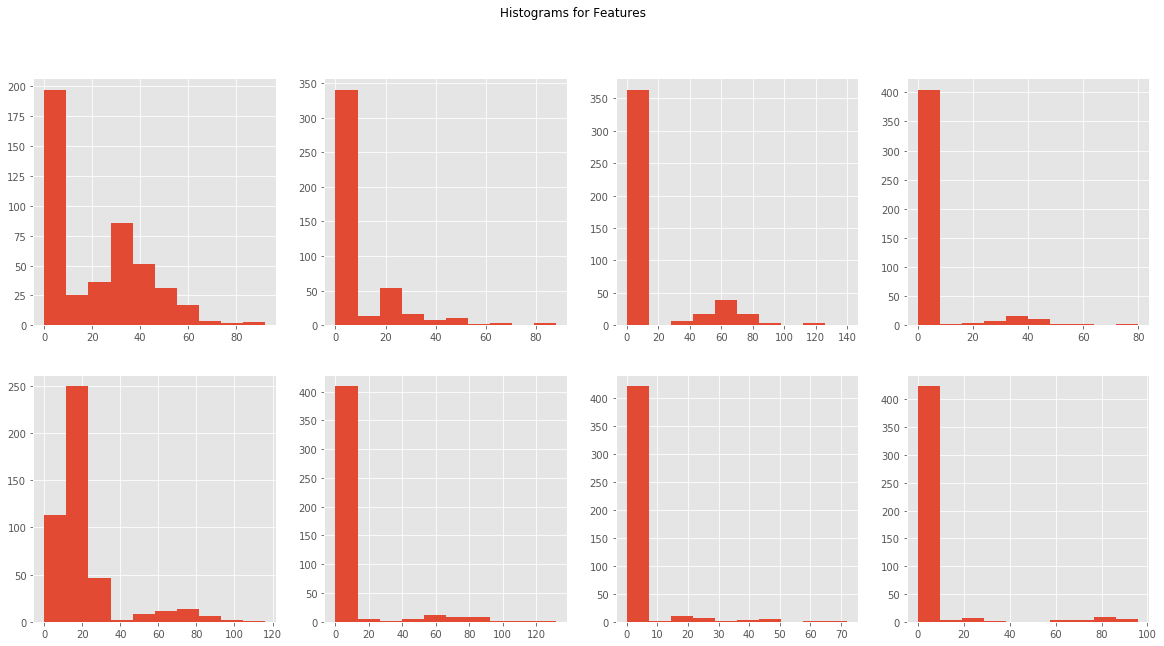

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.hist(X[:,0])
plt.subplot(242)
plt.hist(X[:,1])
plt.subplot(243)
plt.hist(X[:,2])
plt.subplot(244)
plt.hist(X[:,3])

plt.subplot(245)
plt.hist(X[:,4])
plt.subplot(246)
plt.hist(X[:,5])
plt.subplot(247)
plt.hist(X[:,6])
plt.subplot(248)
plt.hist(X[:,7])
plt.suptitle('Histograms for Features')
plt.show()

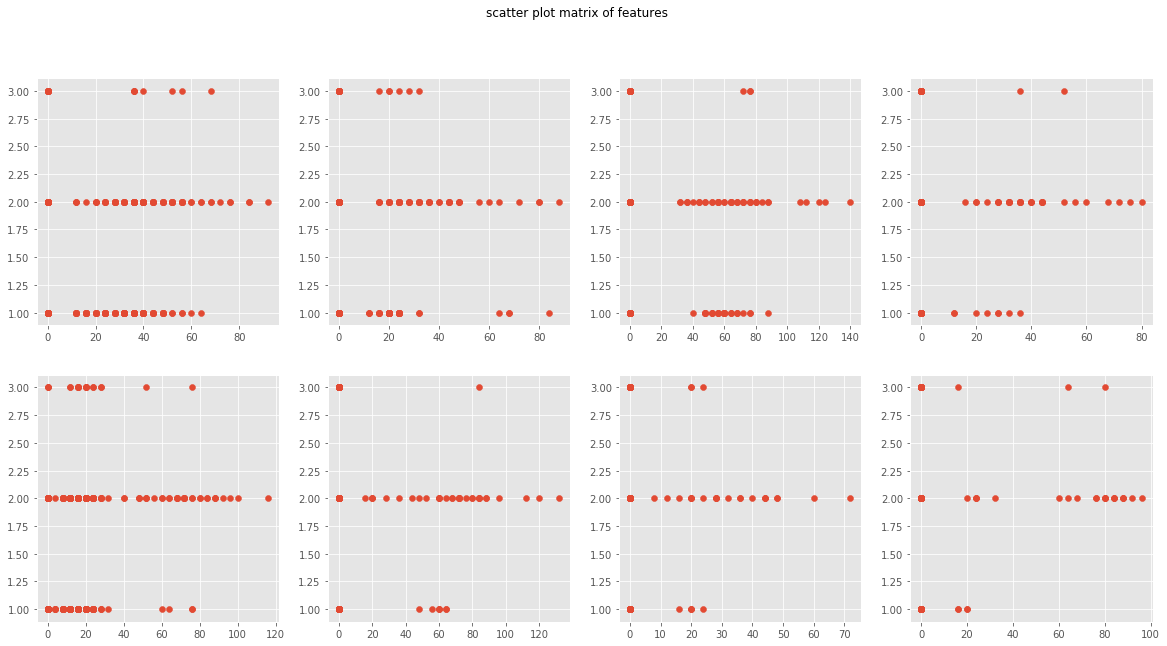

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(241)
plt.scatter(X[:,0],y)
plt.subplot(242)
plt.scatter(X[:,1],y)
plt.subplot(243)
plt.scatter(X[:,2],y)
plt.subplot(244)
plt.scatter(X[:,3],y)
plt.subplot(245)
plt.scatter(X[:,4],y)
plt.subplot(246)
plt.scatter(X[:,5],y)
plt.subplot(247)
plt.scatter(X[:,6],y)
plt.subplot(248)
plt.scatter(X[:,7],y)
plt.suptitle('scatter plot matrix of features')
plt.show()

## Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.7032967032967034

In [10]:
from sklearn.naive_bayes import MultinomialNB 

clf = MultinomialNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.6373626373626373

In [11]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.6703296703296703

In [12]:
from sklearn.naive_bayes import BernoulliNB 

clf = BernoulliNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.7142857142857143

## Writing Naive Bayes with Kernel Density Estimation

In [29]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(trainData_1[:,0:10])
Probability_y1 = np.sum(y_train==1)/(np.sum(y_train==1)+np.sum(y_train==2)+np.sum(y_train==3))
Probability_y1 *= abs(kde.score_samples(X_test))

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(trainData_2[:,0:10])
Probability_y2 = np.sum(y_train==2)/(np.sum(y_train==1)+np.sum(y_train==2)+np.sum(y_train==3))
Probability_y2 *= abs(kde.score_samples(X_test))

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(trainData_3[:,0:10])
Probability_y3 = np.sum(y_train==3)/(np.sum(y_train==1)+np.sum(y_train==2)+np.sum(y_train==3))
Probability_y3 *= abs(kde.score_samples(X_test))

In [49]:
y_predict = [1]*91
right = 0
num = len(y_test) 
for i in range(len(y_test)):
    if Probability_y1[i] > Probability_y2[i]:
        y_predict[i] = 2
        if Probability_y2[i] >Probability_y3[i]:
            y_predict[i] = 3
    else:
        y_predict[i] = 1
        if Probability_y1[i] > Probability_y3[i]:
            y_predict[i] = 3
    if(y_predict[i]==y_test[i]):
        right+=1
        
print(right/num)

0.31868131868131866


## Draw likelihood plot

In [50]:
asd=clf.predict_proba(X)
asd

array([[0.41869615, 0.56847855, 0.01282529],
       [0.81733036, 0.15040951, 0.03226013],
       [0.13903882, 0.78483616, 0.07612502],
       ...,
       [0.42320196, 0.55209831, 0.02469972],
       [0.731506  , 0.23779885, 0.03069516],
       [0.81733036, 0.15040951, 0.03226013]])

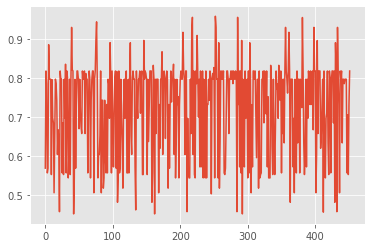

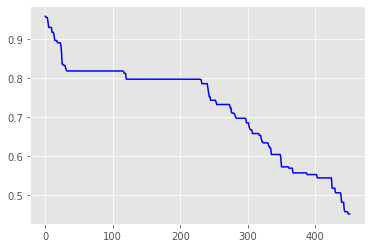

In [52]:
value=[]
index=[]
for i,er in enumerate(asd):
    value.append(np.max(er))
    index.append(i)
    
plt.plot(index,value)
plt.show()
value.sort(reverse=True)
plt.plot(index,value,color='blue')#likelihood plot
plt.show()

# Report

## Q: What features are most useful for solving the problem and why, how features are distributed in the data:

First, I removed the features with low variance, for example, a feature is mostly 0, then this feature is meaningless. Secondly, some vacant data is meaningless. Finally, the chi-square test is used to test the correlation of qualitative independent variables to qualitative dependent variables, leaving only the top 10 features that are closely related to the label.

## Q: Try to change parameters of training to achieve better results

BernoulliNB model has highest accuracy about 71%